# **Data-Driven Forecasting of Product Revenue in Retail Stores**

The objective of this project is to analyze retail product sales data and identify key factors influencing revenue. The model aims to accurately predict product revenue based on pricing, discounts, customer ratings, stock levels, and seasonal patterns.

Dataset From :ChatGPT Generate

**Explanations of Features in the Data Set  :-**

product_id - Unique ID of the product

category - Product category (Electronics, Grocery, Fashion, etc.)

units_sold -Number of units sold

price - Selling price per unit

discount - Discount percentage applied

store_location - Store region (North, South, East, West)

rating - Customer rating of product

ad_spend - Marketing spend for the product

season - Season of sale (Summer, Winter, Rainy)

competitor_price - Competitor’s price

stock_level - Quantity in stock

supplier_score - Supplier performance score

quality_check - “Pass”, “Fail”, or missing

defect_rate - Manufacturing defect percentage

region_code - Numeric location code

 revenue - (Target)


*`IMPORT LIBRARIES`*

In [ ]:
import pandas as pd
import numpy as np

#for visualizing:-
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# MODELS
# for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection

#from sklearn.utils import class_weight
#from sklearn.model_selection import

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

# Understanding the Data

In [ ]:
df=pd.read_csv("retail_sales.csv")
df

,product_id,category,units_sold,price,discount,store_location,rating,ad_spend,season,competitor_price,stock_level,supplier_score,quality_check,defect_rate,region_code,revenue
0,8270,Fashion,397.0,1491.431124,49.572482,East,3.776330,5099.700743,Rainy,1785.676927,952,9.201807,Pass,13.158136,1,295361.645468
1,1860,NaN,460.0,1413.587961,1.800908,NaN,4.808024,10268.201493,Summer,1334.582912,509,9.079750,Fail,14.400809,13,637550.516631
2,6390,Sports,338.0,1293.099132,39.165854,West,1.737804,11842.549871,NaN,675.049833,560,7.095875,Fail,3.730146,6,263193.546078
3,6191,Home,470.0,795.281741,20.903985,NaN,2.897701,15958.637742,Winter,1115.631798,391,9.475327,Fail,5.620372,19,296909.228137
4,6734,Fashion,96.0,1219.143464,42.658965,South,4.672723,11533.413677,Summer,NaN,487,4.347471,NaN,2.542006,13,64415.572600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,8674,Sports,349.0,507.980887,13.100274,West,3.781740,19723.380021,Winter,1026.011029,438,8.508811,Fail,0.943579,7,156794.304305
119996,3550,Home,114.0,281.419730,47.639077,South,3.085377,3045.510771,Rainy,138.051969,417,1.435261,Fail,1.624816,7,19292.916741
119997,1974,Sports,195.0,1093.624093,17.513982,South,2.382406,NaN,Summer,277.271834,263,9.520256,NaN,14.343025,6,NaN
119998,8734,Home,14.0,NaN,25.790388,South,4.166097,2645.784228,Summer,1894.913814,445,5.423129,Pass,8.214100,7,NaN


In [ ]:
df.shape

(120000, 16)

In [ ]:
df.describe()

,product_id,units_sold,price,discount,rating,ad_spend,competitor_price,stock_level,supplier_score,defect_rate,region_code,revenue
count,120000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,120000.000000,120000.000000,120000.000000,120000.000000,97808.000000
mean,5504.811125,250.147325,1023.834990,25.009561,3.002065,9995.535680,1080.045914,499.046325,5.516300,7.506997,10.012717,193287.624248
std,2601.360535,144.435873,563.139058,14.415961,1.153593,5772.274645,588.947811,288.276225,2.596176,4.338458,5.474540,172186.630436
min,1000.000000,1.000000,50.017483,0.000167,1.000091,0.266535,60.005186,0.000000,1.000021,0.000053,1.000000,-15495.364643
25%,3250.000000,125.000000,535.564605,12.523234,2.006989,4987.502833,568.239497,249.000000,3.267897,3.732057,5.000000,54921.025862
50%,5509.000000,250.000000,1025.419828,25.033296,2.998833,9988.070982,1080.114233,500.000000,5.524151,7.504816,10.000000,142591.192873
75%,7755.000000,376.000000,1510.165926,37.483451,4.002379,14994.828762,1589.485237,748.000000,7.769711,11.267901,15.000000,288118.413300
max,9998.000000,499.000000,1999.998662,49.999559,4.999980,19999.856343,2099.982158,999.000000,9.999841,14.999922,19.000000,974966.194332


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_id        120000 non-null  int64  
 1   category          100018 non-null  object 
 2   units_sold        114000 non-null  float64
 3   price             114000 non-null  float64
 4   discount          114000 non-null  float64
 5   store_location    96024 non-null   object 
 6   rating            114000 non-null  float64
 7   ad_spend          114000 non-null  float64
 8   season            90023 non-null   object 
 9   competitor_price  114000 non-null  float64
 10  stock_level       120000 non-null  int64  
 11  supplier_score    120000 non-null  float64
 12  quality_check     80078 non-null   object 
 13  defect_rate       120000 non-null  float64
 14  region_code       120000 non-null  int64  
 15  revenue           97808 non-null   float64
dtypes: float64(9), int64

In [ ]:
df.describe(include=['O']).T

,count,unique,top,freq
category,100018,5,Grocery,20149
store_location,96024,4,West,24093
season,90023,3,Rainy,30277
quality_check,80078,2,Pass,40196


## VISUALIZATION

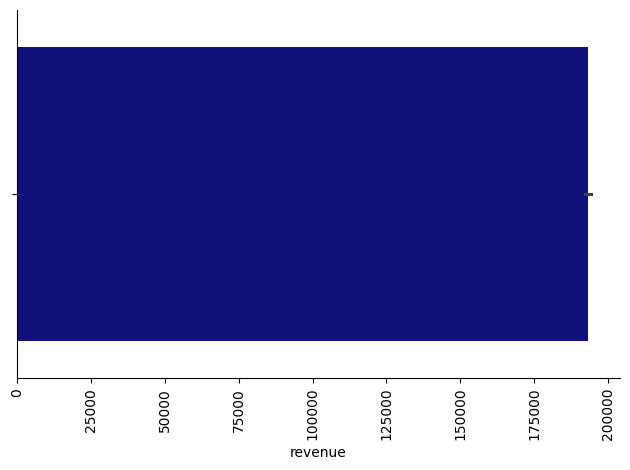

In [ ]:
sns.barplot(x=df["revenue"],color="darkblue")
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine(top=True,right=True)

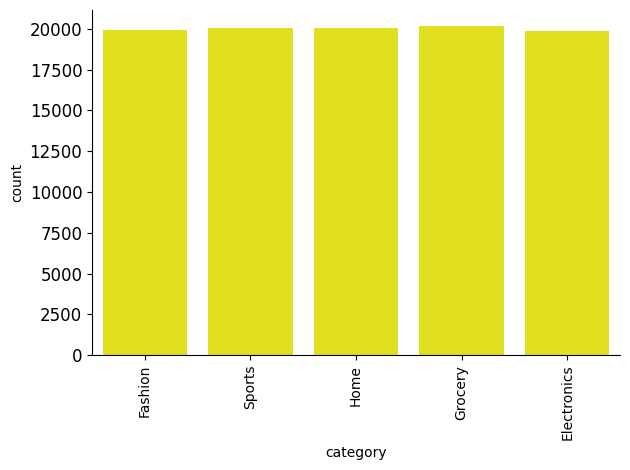

In [ ]:
sns.countplot(x=df["category"],color="yellow")
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine(top=True,right=True)

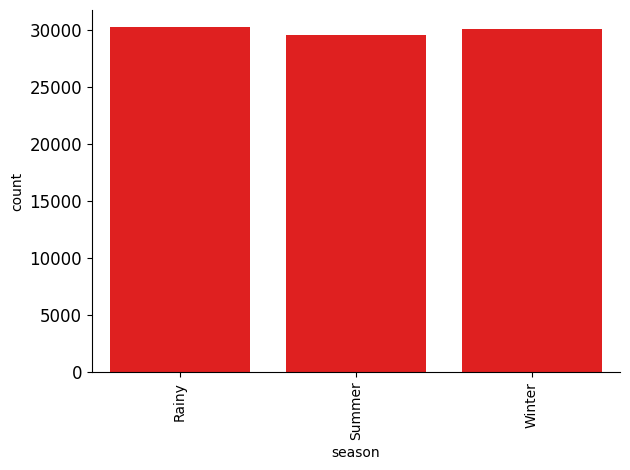

In [ ]:
sns.countplot(x=df["season"],color="red")
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine(top=True,right=True)

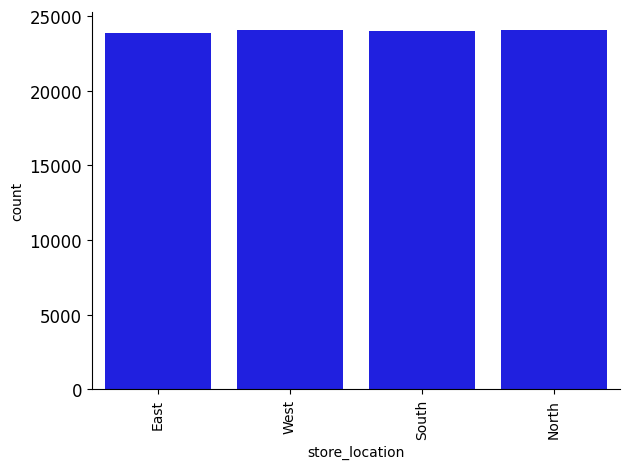

In [ ]:
sns.countplot(x=df["store_location"],color="blue")
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine(top=True,right=True)

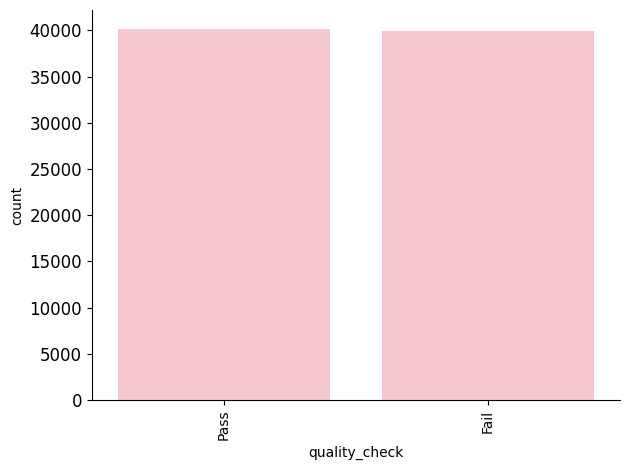

In [ ]:
sns.countplot(x=df["quality_check"],color="pink")
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine(top=True,right=True)

# DATA CLEANING

In [ ]:
df.duplicated().sum() #check duplicates in the dataset

np.int64(0)

In [ ]:
df.isnull().sum() #check missing values in the dataset

product_id              0
category            19982
units_sold           6000
price                6000
discount             6000
store_location      23976
rating               6000
ad_spend             6000
season              29977
competitor_price     6000
stock_level             0
supplier_score          0
quality_check       39922
defect_rate             0
region_code             0
revenue             22192
dtype: int64

In [ ]:
(df.isnull().sum() / len(df)) * 100     #check the percentage of null values

product_id           0.000000
category            16.651667
units_sold           5.000000
price                5.000000
discount             5.000000
store_location      19.980000
rating               5.000000
ad_spend             5.000000
season              24.980833
competitor_price     5.000000
stock_level          0.000000
supplier_score       0.000000
quality_check       33.268333
defect_rate          0.000000
region_code          0.000000
revenue             18.493333
dtype: float64

In [ ]:
#Get list of categorical variables

cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['category', 'store_location', 'season', 'quality_check'], dtype='object')

In [ ]:
# Missing values in categorical variables

for i in cat_cols:
    print(i, df[i].isnull().sum())

category 19982
store_location 23976
season 29977
quality_check 39922


In [ ]:
#Fill missing categorical values:

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [ ]:
for i in cat_cols:
    print(i, df[i].isnull().sum())

category 0
store_location 0
season 0
quality_check 0


In [ ]:
#Get list of neumeric variables

num_cols = df.select_dtypes(include=['int64','float64']).columns

In [ ]:
# Missing values in numeric variables

for i in num_cols:
    print(i, df[i].isnull().sum())

product_id 0
units_sold 6000
price 6000
discount 6000
rating 6000
ad_spend 6000
competitor_price 6000
stock_level 0
supplier_score 0
defect_rate 0
region_code 0
revenue 22192


In [ ]:
#Fill missing numerical values:

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [ ]:
for i in num_cols:
    print(i, df[i].isnull().sum())

product_id 0
units_sold 0
price 0
discount 0
rating 0
ad_spend 0
competitor_price 0
stock_level 0
supplier_score 0
defect_rate 0
region_code 0
revenue 0


In [ ]:
df.isnull().sum()

product_id          0
category            0
units_sold          0
price               0
discount            0
store_location      0
rating              0
ad_spend            0
season              0
competitor_price    0
stock_level         0
supplier_score      0
quality_check       0
defect_rate         0
region_code         0
revenue             0
dtype: int64

ENCODING

In [ ]:
ctgrl_clm=df.select_dtypes(include=['object','category']).columns.tolist()

print("Categorical Columns :",ctgrl_clm)

Categorical Columns : ['category', 'store_location', 'season', 'quality_check']


In [ ]:
df['category'].unique()

array(['Fashion', 'Grocery', 'Sports', 'Home', 'Electronics'],
      dtype=object)

In [ ]:
df['store_location'].unique()

array(['East', 'West', 'South', 'North'], dtype=object)

In [ ]:
df['season'].unique()

array(['Rainy', 'Summer', 'Winter'], dtype=object)

In [ ]:
df['quality_check'].unique()

array(['Pass', 'Fail'], dtype=object)

In [ ]:
df['category'].value_counts()

category
Grocery        40131
Sports         20040
Home           20030
Fashion        19927
Electronics    19872
Name: count, dtype: int64

In [ ]:
df['category']=df['category'].map({'Fashion':1, 'Grocery':4, 'Sports':3, 'Home':2, 'Electronics':0})

In [ ]:
df['category'].value_counts()

category
4    40131
3    20040
2    20030
1    19927
0    19872
Name: count, dtype: int64

In [ ]:
df['store_location'].value_counts()

store_location
West     48069
North    24081
South    24010
East     23840
Name: count, dtype: int64

In [ ]:
df['store_location']=df['store_location'].map({'East':0, 'West':3, 'South':1, 'North':2})

In [ ]:
df['store_location'].value_counts()

store_location
3    48069
2    24081
1    24010
0    23840
Name: count, dtype: int64

In [ ]:
df['season'].value_counts()

season
Rainy     60254
Winter    30123
Summer    29623
Name: count, dtype: int64

In [ ]:
df['season']=df['season'].map({'Rainy':2, 'Summer':0, 'Winter':1})

In [ ]:
df['season'].value_counts()

season
2    60254
1    30123
0    29623
Name: count, dtype: int64

In [ ]:
df['quality_check'].value_counts()

quality_check
Pass    80118
Fail    39882
Name: count, dtype: int64

In [ ]:
df['quality_check']=df['quality_check'].map({'Pass':1, 'Fail':0})

In [ ]:
df['quality_check'].value_counts()

quality_check
1    80118
0    39882
Name: count, dtype: int64

In [ ]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_id        120000 non-null  int64  
 1   category          120000 non-null  int64  
 2   units_sold        120000 non-null  float64
 3   price             120000 non-null  float64
 4   discount          120000 non-null  float64
 5   store_location    120000 non-null  int64  
 6   rating            120000 non-null  float64
 7   ad_spend          120000 non-null  float64
 8   season            120000 non-null  int64  
 9   competitor_price  120000 non-null  float64
 10  stock_level       120000 non-null  int64  
 11  supplier_score    120000 non-null  float64
 12  quality_check     120000 non-null  int64  
 13  defect_rate       120000 non-null  float64
 14  region_code       120000 non-null  int64  
 15  revenue           120000 non-null  float64
dtypes: float64(9), int64

# DATA TRANSFORMING

REMOVING UNWANTED FEATURES

<Axes: >

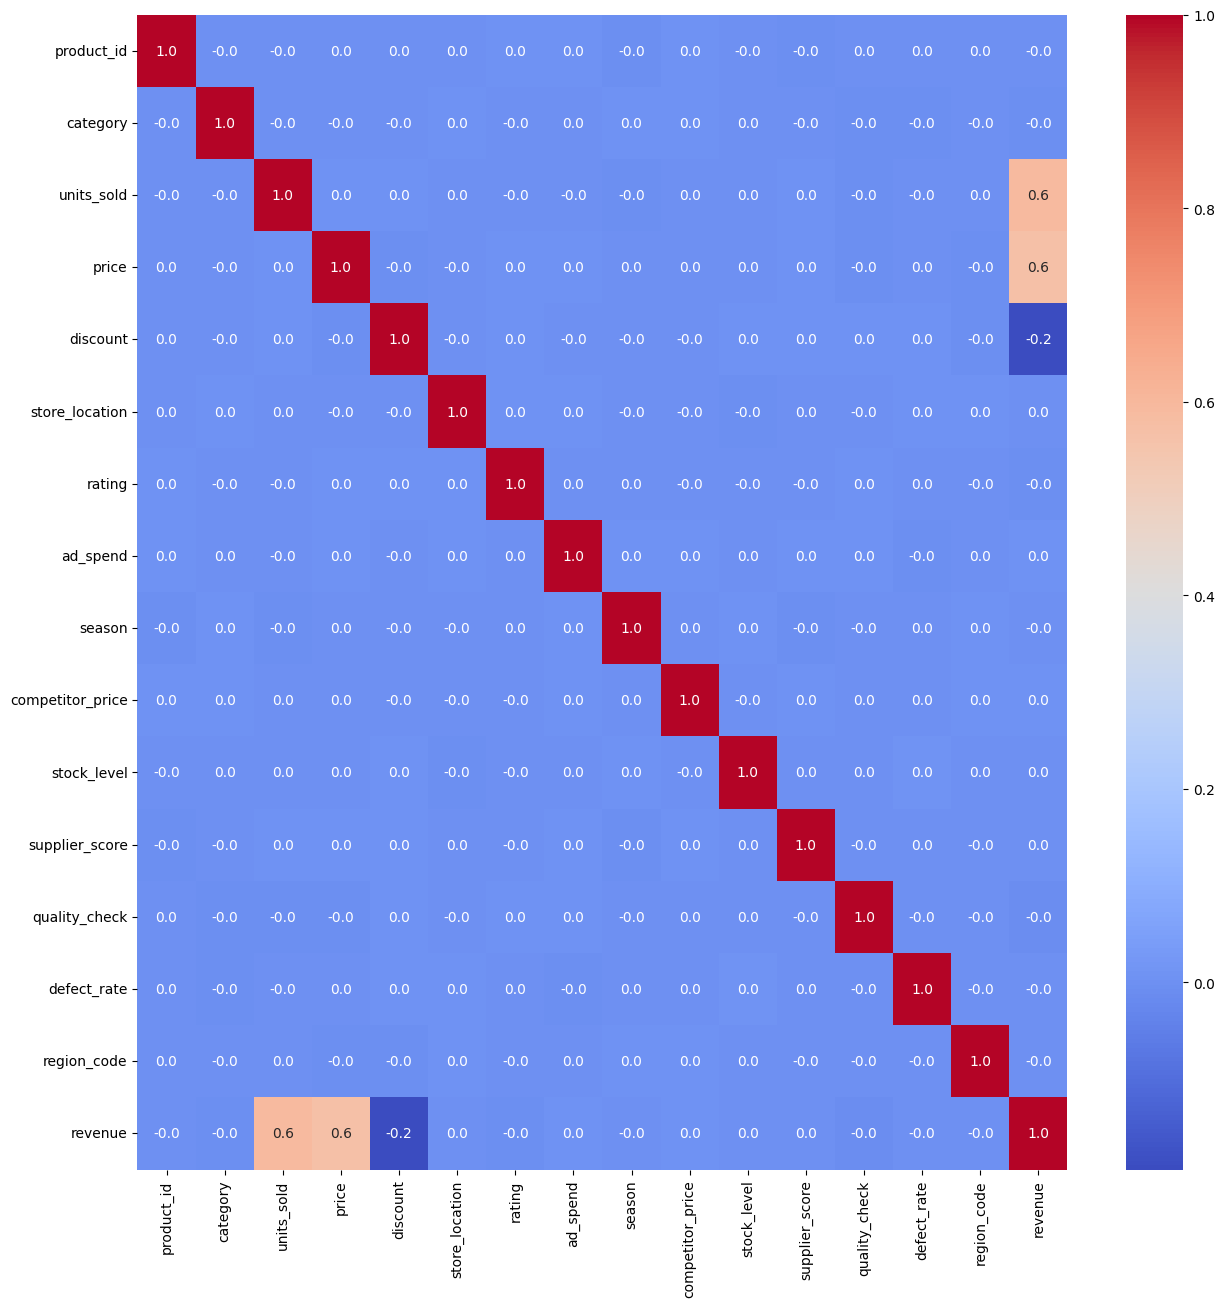

In [ ]:
#BASED ON CORRELATION

plt.figure(figsize=(15,15))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm',fmt='0.01f')

In [ ]:
corr_matrix=df.corr()

#set the correlation threshold
threshold=0.5

# Find pairs of features with high correlation
highly_correlated_pairs=[]
for i in range (len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j])>threshold:   #check if the absolute correlation exceeds the threshold
            highly_correlated_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))


#Print all pairs of highly correlated features
print(highly_correlated_pairs)

[('revenue', 'units_sold'), ('revenue', 'price')]


SCALING

In [ ]:
# create a copy of the original data for comparison
df_scaled=df.copy()

#select numeric coumns excluding 'revenue'
numeric_cols=df.drop(columns=['revenue']).select_dtypes(include=['number']).columns

#initialize the standerdscaler
scaler=StandardScaler()

#apply the scaler only to the numeric columns
df_scaled[numeric_cols]=scaler.fit_transform(df[numeric_cols])
df_scaled.head()

,product_id,category,units_sold,price,discount,store_location,rating,ad_spend,season,competitor_price,stock_level,supplier_score,quality_check,defect_rate,region_code,revenue
0,1.062982,-0.898705,1.043203,0.851769,1.748057,-1.548144,0.688760,-0.870135,0.900607,1.229246,1.571255,1.419597,0.705543,1.302574,-1.646303,295361.645468
1,-1.401123,1.115438,1.490716,0.709946,-1.651842,1.027577,1.606328,0.048531,-1.517969,0.443413,0.034528,1.372582,-1.417348,1.589007,0.545671,637550.516631
2,0.340281,0.444057,0.624103,0.490428,1.007418,1.027577,-1.124265,0.328361,0.900607,-0.705534,0.211443,0.608426,-1.417348,-0.870555,-0.732981,263193.546078
3,0.263782,-0.227324,1.561749,-0.416545,-0.292278,1.027577,-0.092676,1.059967,-0.308681,0.061987,-0.374803,1.524952,-1.417348,-0.434862,1.641658,296909.228137
4,0.472520,-0.898705,-1.094915,0.355688,1.256022,-0.689571,1.485994,0.273414,-1.517969,0.000113,-0.041788,-0.450214,0.705543,-1.144419,0.545671,64415.572600


HANDLING OUTLIERS

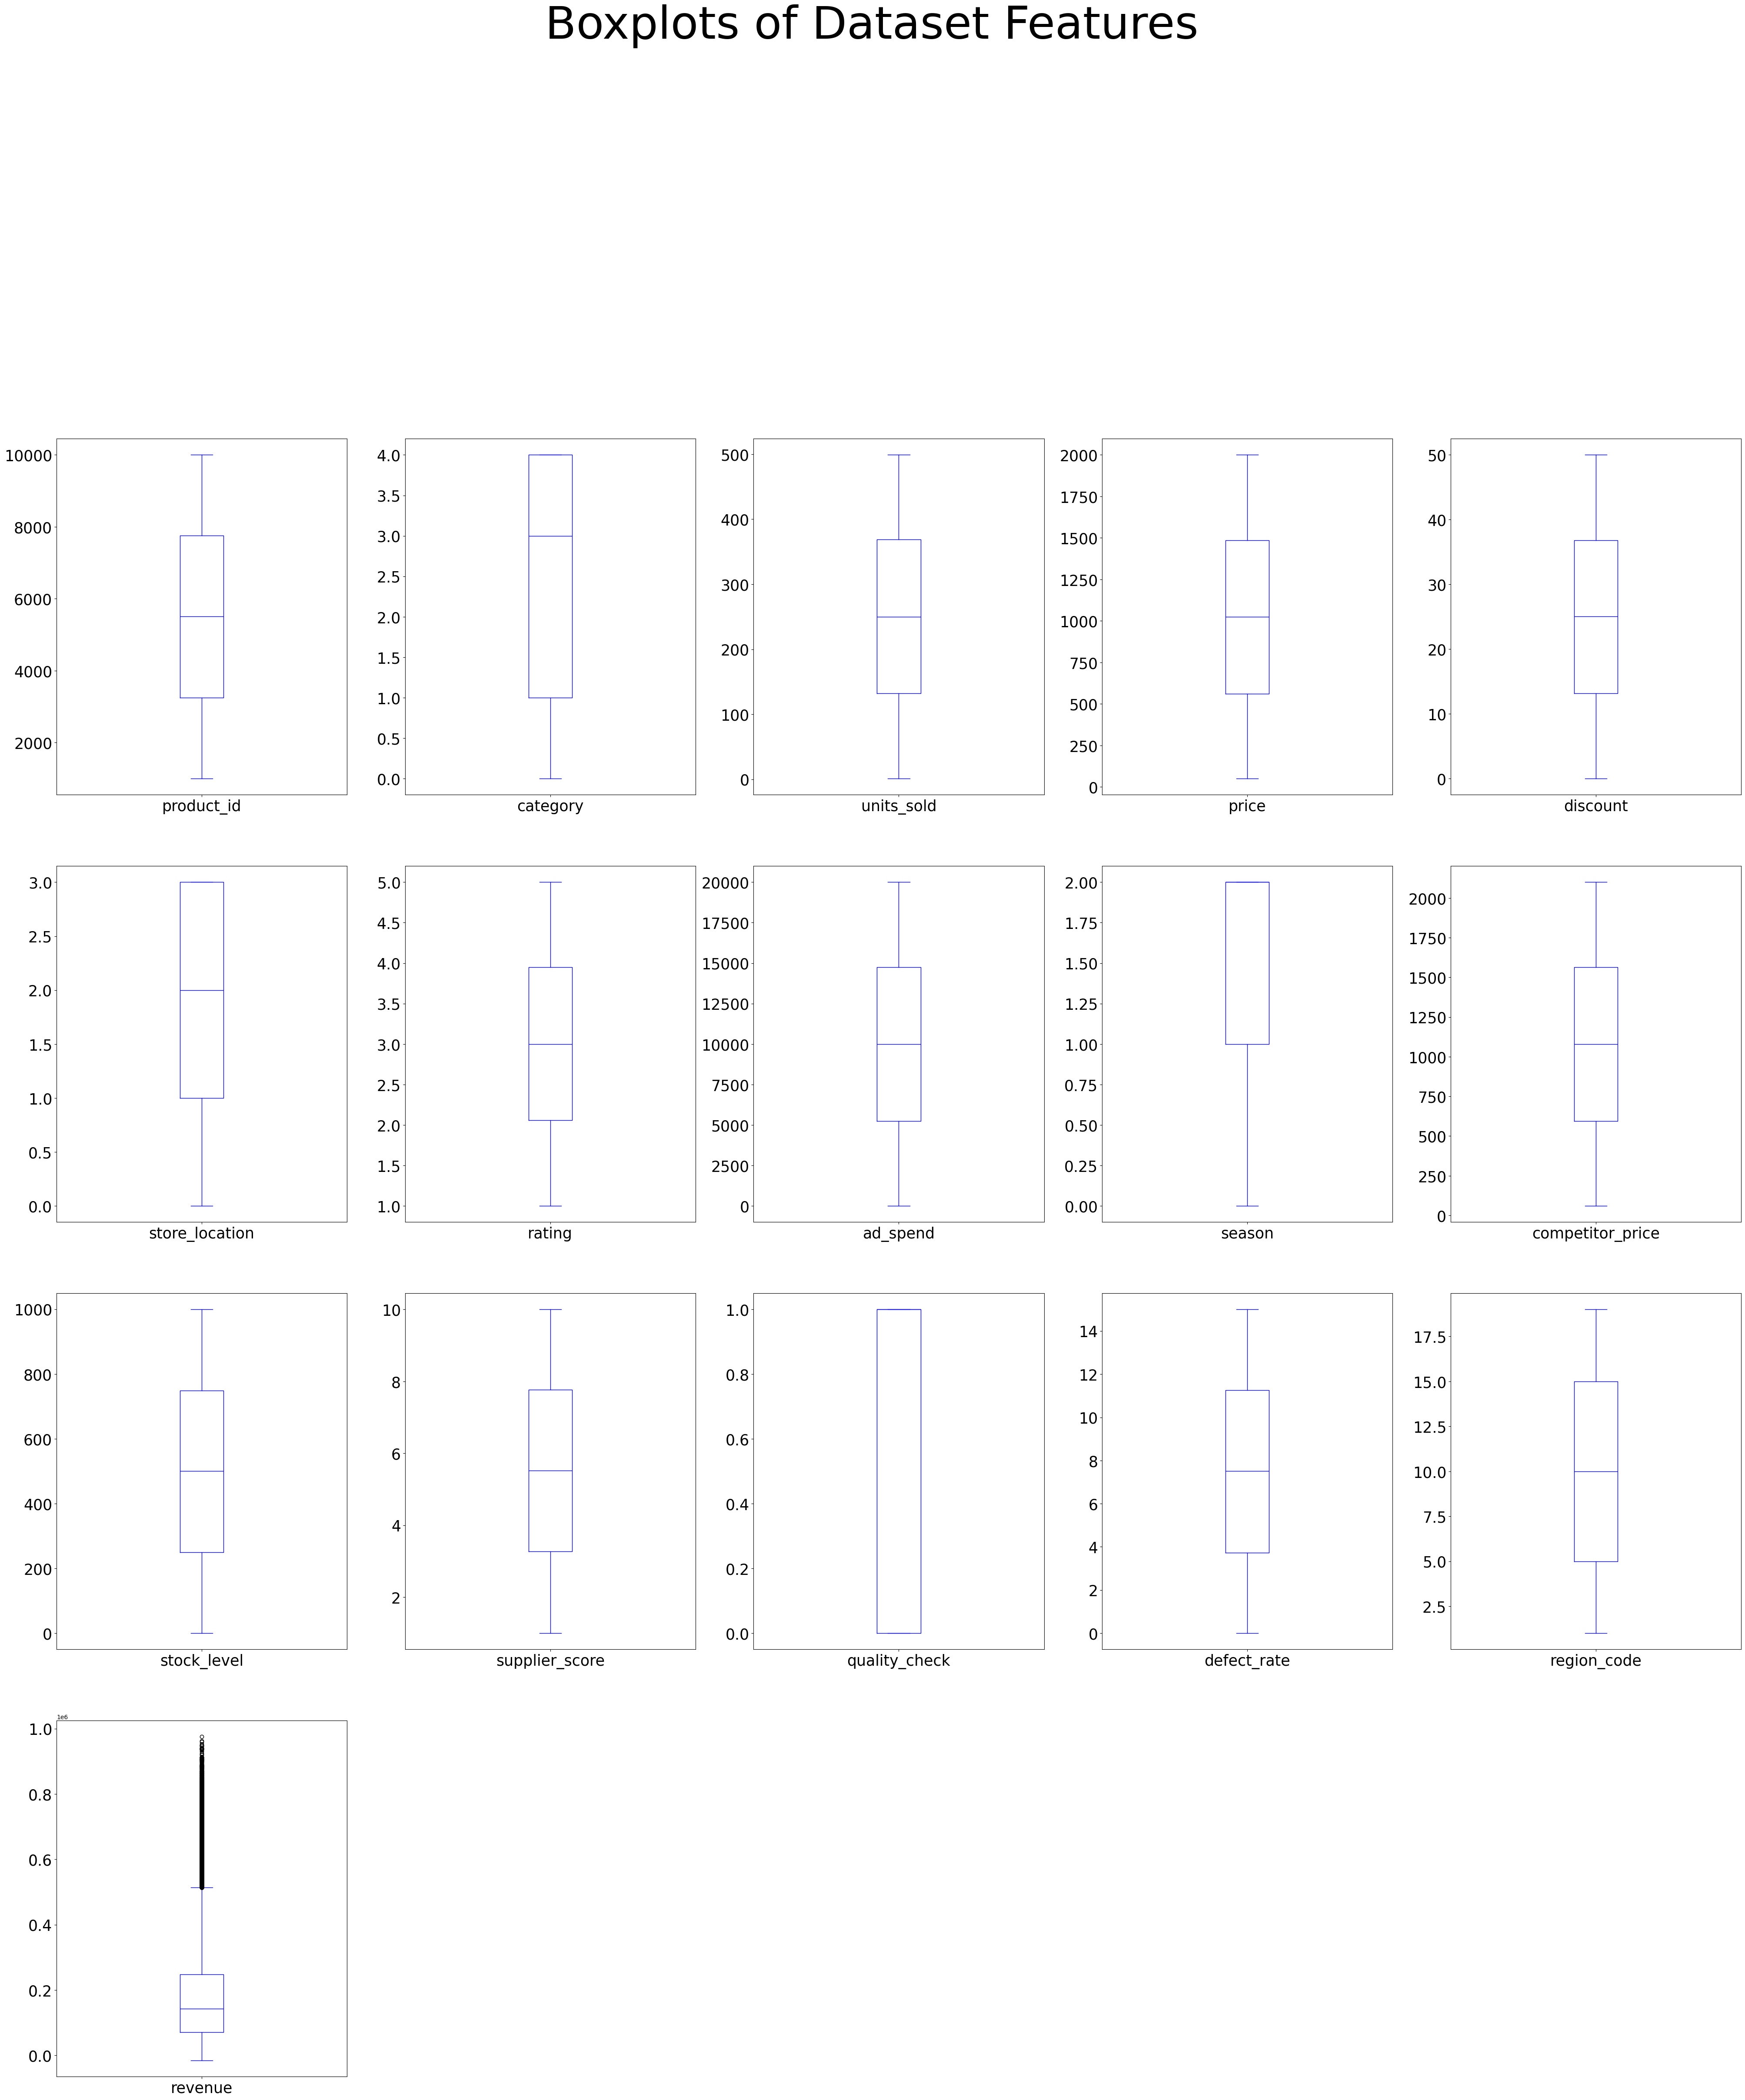

In [ ]:
#USING BOXPLOT

df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='blue',fontsize=25)
plt.suptitle("Boxplots of Dataset Features",fontsize=75)
plt.show()

In [ ]:
# create a copy the original data for comparison
df_copy=df.copy()

def remove_outliers_iqr(df,exclude_columns):
    #Loop thruogh numeric columns
    for column in df.select_dtypes(include=['number']):
        if column in exclude_columns:
            continue  #skip exclude columns

        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR=Q3-Q1

        #Define outlier bonds
        lower_bond=Q1-1.5*IQR
        upper_bond=Q3+1.5*IQR

        #Filter out the outliers
        df=df[(df[column]>=lower_bond)& (df[column]<=upper_bond)]
    return df

#Define the columns to exclude
exclude_columns=['revenue']

#remove outliers
df=remove_outliers_iqr(df,exclude_columns)

#print shapes of data before and after removing outliers
print("shape of data before removing outliers :",df_copy.shape)
print("shape of data after removing outliers :",df.shape)
print("Number of outlier removed:",df_copy.shape[0]-df.shape[0])

shape of data before removing outliers : (120000, 16)
shape of data after removing outliers : (120000, 16)
Number of outlier removed: 0


# REGRESSION MODELING

In [ ]:
x = df.drop("revenue", axis=1)
y = df["revenue"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('shape of training feature:',x_train.shape)
print('shape of testing feature :', x_test.shape)
print('shape of training target:',y_train.shape)
print('shape of testing target:',y_test.shape)

shape of training feature: (96000, 15)
shape of testing feature : (24000, 15)
shape of training target: (96000,)
shape of testing target: (24000,)


In [ ]:
models={"Linear_Regression":LinearRegression(),
        "RandomForest_Regressor":RandomForestRegressor(),
        "GradientBoosting_Regressore":GradientBoostingRegressor(),
        "DecisionTree_Regressor":DecisionTreeRegressor(),
        "svm":SVR(),

        #"MLP_Regressor":MLPRegressor(max_iter=500),
        "AdaBoostRegressor":AdaBoostRegressor(),
        "ExtraTreesRegressor":ExtraTreesRegressor(),
        "BaggingRegressor":BaggingRegressor(),
        "LGBMRegressor":LGBMRegressor(),

        #"CatBoostRegressor":CatBoostRegressor(),
        "XGBRegressor":XGBRegressor()}

In [ ]:
#Dictionary to store results
results={'Model':[],'MSE':[],'MAE':[],'R2':[]}

#Loop through the models ,train them and calculate the matrics
for model_name,model in models.items():
    #TRAIN THE MODEL
    model.fit(x_train,y_train)

    #make predictions
    y_pred=model.predict(x_test)

    #calculate metrics
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    #store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)

#convert results to a DataFrame
results_df=pd.DataFrame(results)

#Sidplay the results
results_df

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2581
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 15
[LightGBM] [Info] Start training from score 184061.330398


,Model,MSE,MAE,R2
0,Linear_Regression,7.013941e+09,59661.538447,0.709962
1,RandomForest_Regressor,1.105997e+09,12204.864458,0.954265
2,GradientBoosting_Regressore,1.865583e+09,26788.404642,0.922855
3,DecisionTree_Regressor,1.930136e+09,15409.627124,0.920186
4,svm,2.582570e+10,107595.916468,-0.067934
5,AdaBoostRegressor,5.532383e+09,59439.077484,0.771227
6,ExtraTreesRegressor,1.221011e+09,16713.485847,0.949509
7,BaggingRegressor,1.254230e+09,13412.742276,0.948136
8,LGBMRegressor,2.481530e+08,9716.095269,0.989738
9,XGBRegressor,3.599071e+08,9948.899903,0.985117


In [ ]:
x1s=df_scaled.drop(['revenue'],axis=1)
y1s=df_scaled[['revenue']]

x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)

#Dictionary to store results
results={'Model':[],'MSE':[],'MAE':[],'R2':[]}

#Loop through the models ,train them and calculate the matrics
for model_name,model in models.items():
    #TRAIN THE MODEL
    model.fit(x1s_train,y1s_train)

    #make predictions
    y1s_pred=model.predict(x1s_test)

    #calculate metrics
    mse1=mean_squared_error(y1s_test,y1s_pred)
    mae1=mean_absolute_error(y1s_test,y1s_pred)
    r21=r2_score(y1s_test,y1s_pred)

    #store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse1)
    results['MAE'].append(mae1)
    results['R2'].append(r21)

#convert results to a DataFrame
results_df1=pd.DataFrame(results)

#sort by accuracy
results_df1=results_df1.sort_values(by='R2',ascending=False)

#Display the sorted dataframe with background gradient
results_df1.style.background_gradient('Blues')


c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validat

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2586
[LightGBM] [Info] Number of data points in the train set: 96000, number of used features: 15
[LightGBM] [Info] Start training from score 184061.330398


,Model,MSE,MAE,R2
8,LGBMRegressor,216065335.799864,9585.674833,0.991065
9,XGBRegressor,359838944.000000,9947.597656,0.985120
1,RandomForest_Regressor,1096481745.206841,12211.230453,0.954659
6,ExtraTreesRegressor,1215173449.366479,16726.365852,0.949751
7,BaggingRegressor,1222750903.387593,13098.174448,0.949437
2,GradientBoosting_Regressore,1865582695.990239,26788.404642,0.922855
3,DecisionTree_Regressor,2017504766.085301,15593.757706,0.916573
5,AdaBoostRegressor,6432991637.647810,67561.861396,0.733986
0,Linear_Regression,7013940889.478135,59661.538447,0.709962
4,svm,25589141334.223469,107100.620114,-0.058152


Based On The Evaluation Of The Regression Models For Predicting `"revenue"` , The `LGBMRegressor` is the best performing model with r2 score :0.99